#EOSC 511
##Assignment 4, Lab4
###Tereza Jarníková
###Student number: 81586142

**Problems:**

    -   2: Tableau

    -   3: RK4 comparison

    -   4: Embedded
    
    -   Programming A
    
    -   Programming B
    
    -   Programming C
    

#####Problem 2 - tableau: 
Write out the tableau for:
   
   -Heun’s method
   
   -the fourth-order Runge-Kutta method discussed in the next section.

#####Problem 2 - tableau solution: 

In the form used by the lab, the tableau for Heun's method is as follows:

$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &c_i \\ \hline
1 & 0 &0 & \frac{1}{4}\\ 
2 & \frac{2}{3} &\frac{2}{3} & \frac{3}{4}\\\hline 
{j=} & 1 &  2 & \\ \hline
\end{array}
$$ 




The tableau for the 4th order R-K method given is as follows:


$$
\begin{array}{|c|c|cccc|c|} \hline
i & a_i &{b_{ij}} &  &  && c_i \\ \hline
1 & 0 &0 & 0 & 0 && \frac{1}{6}\\ 
2 & \frac{1}{2} &\frac{1}{2} & 0 & 0 && \frac{1}{3}\\ 
3 & \frac{1}{2} &0 & \frac{1}{2} & 0 && \frac{1}{3}\\ 
4 & 1 & 0 & 0 & 1 && \frac{1}{6}\\\hline 
{j=} & 1 &  2 & 3 & 4 \\ \hline
\end{array}
$$ 


#####Problem 3 - Runge-Kutta Comparison: 
In the demo below, compare compare solutions to the test
problem (eq: test)

$$
\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test}
$$ 

generated with the
fourth-order Runge-Kutta method to solutions generated by the forward
Euler and midpoint methods.

1.  Based on the numerical solutions of (eq: test), which of the
    three methods appears more accurate?

2.  Again determine how the error changes relative to the change in
    stepsize, as the stepsize is halved.

#####Problem 3 - R-K comparison solution: 

1) To compare the accuracy of the 3 numerical methods, I first compared their solutions with the actual equation (first plot), but accuracy is not clear at this resolution. I then plotted the global error vs. time for the 3 methods (at a step size of .25), and here it becomes evident that the RK method (order 1E-9 at a step size of .025) is by far the most accurate.

2) I printed error after 1 step and at t= Tend for 3 different step sizes (and plotted error vs. stepsize) (see the table and graphs below). It appears that error for all 3 methods increases exponentially as step size is doubled, though the magnitude of the relative increase is different - the RK method is relatively most affected by changes in stepsize. 
 

/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


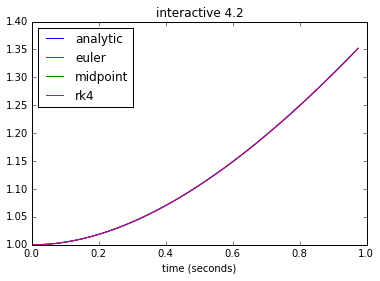

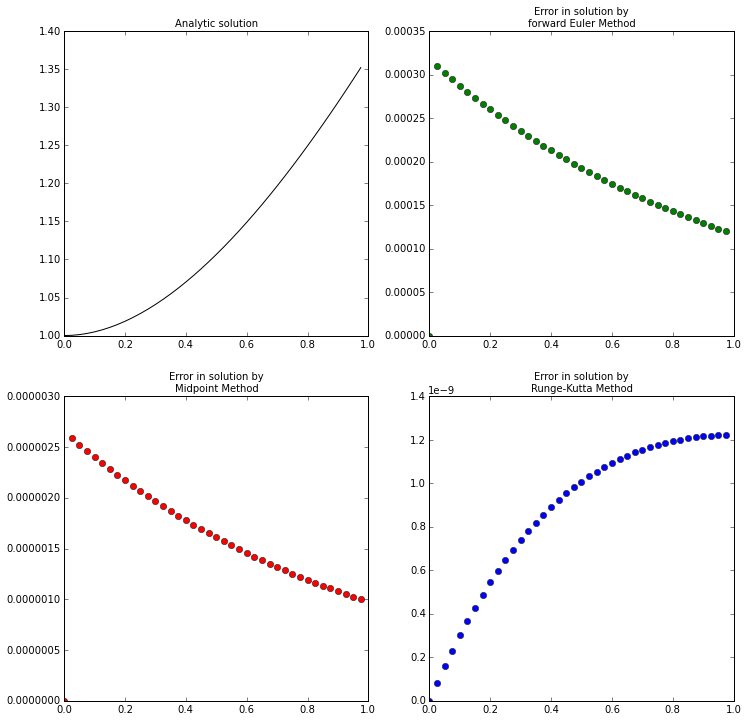

In [39]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numlabs.lab4.lab4_functions import initinter41,eulerinter41,midpointinter41,\
                                        rk4ODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.025,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
analytic=timeVec + np.exp(-timeVec)
theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,ye,'r-',label='euler')
l3=theAx.plot(timeVec,ym,'g-',label='midpoint')
l4=theAx.plot(timeVec,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('interactive 4.2')

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        y = analytic   
        color = 'k'
        str = "Analytic solution"

    elif i == 2:
        y = abs(analytic-ye)
        color = 'go'
        str = "Error in solution by \nforward Euler Method"
    elif i == 3:
        y=abs(analytic-ym)
        color = 'ro'
        str = "Error in solution by \nMidpoint Method"
    elif i == 4:
        y= abs(analytic-yrk)
        color = 'bo'
        str = "Error in solution by \nRunge-Kutta Method"        

    ax.plot(timeVec,y, color)
    ax.hold(True)
    titl =  str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
#     if (i == 2):
#         ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()


In [40]:
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.025,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)

for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
# print("**")
# print(coeff.dt)
# an=timeVec + np.exp(-timeVec)
# print('anal')
# print(an[0])
# print(an[1])
# print('euler')
# print(ye[0])
# print(abs(an[1]-ye[1]))
# print(abs(an[nsteps-1]-ye[nsteps-1]))
# print('mp')
# print(ym[0])
# print(abs(an[1]-ym[1]))
# print(abs(an[nsteps-1]-ym[nsteps-1]))
# print('rk')
# print(yrk[0])
# print(abs(an[1]-yrk[1]))
# print(abs(an[nsteps-1]-yrk[nsteps-1]))


initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.0125,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)

for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
# print("**")
# print(coeff.dt)
# an=timeVec + np.exp(-timeVec)
# print('anal')
# print(an[0])
# print(an[1])
# print('euler')
# print(ye[0])
# print(abs(an[1]-ye[1]))
# print(abs(an[nsteps-1]-ye[nsteps-1]))
# print('mp')
# print(ym[0])
# print(abs(an[1]-ym[1]))
# print(abs(an[nsteps-1]-ym[nsteps-1]))
# print('rk')
# print(yrk[0])
# print(abs(an[1]-yrk[1]))
# print(abs(an[nsteps-1]-yrk[nsteps-1]))

initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.00625,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)
timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
y=coeff.yinitial
ye.append(coeff.yinitial)
ym.append(coeff.yinitial)
yrk.append(coeff.yinitial)

for i in np.arange(1,nsteps):
    ynew=eulerinter41(coeff,y,timeVec[i-1])
    ye.append(ynew)
    ynew=midpointinter41(coeff,y,timeVec[i-1])
    ym.append(ynew)
    ynew=rk4ODEinter41(coeff,y,timeVec[i-1])
    yrk.append(ynew)
    y=ynew
# print("**")
# print(coeff.dt)
# an=timeVec + np.exp(-timeVec)
# print('anal')
# print(an[0])
# print(an[1])
# print('euler')
# print(ye[0])
# print(abs(an[1]-ye[1]))
# print(abs(an[nsteps-1]-ye[nsteps-1]))
# print('mp')
# print(ym[0])
# print(abs(an[1]-ym[1]))
# print(abs(an[nsteps-1]-ym[nsteps-1]))
# print('rk')
# print(yrk[0])
# print(abs(an[1]-yrk[1]))
# print(abs(an[nsteps-1]-yrk[nsteps-1]))
    

    
    



Error after 1 step
$$
\begin{array}{|c|c|cccc|c|} \hline
dt & euler & midpoint & R-K \\ \hline
.025 & 3.10E-04  &2.59E-06 & 8.10E-11\\ 
.0125 & 7.78E-05 &3.24E-07 & 2.54E-12\\ 
.0625 & 1.95E-05 &4.06E-08 &7.93E-14\\ 
\end{array}
$$ 

Error at T_end
$$
\begin{array}{|c|c|cccc|c|} \hline
dt & euler & midpoint & R-K \\ \hline
.025 & 1.12E-04 &1.00E-06 & 1.22E-9\\ 
.0125 & 2.93E-05 &1.22E-07& 7.56E-11\\ 
.0625 & 1.95E-05 &4.06E-08 &7.93E-14\\ 
\end{array}
$$ 

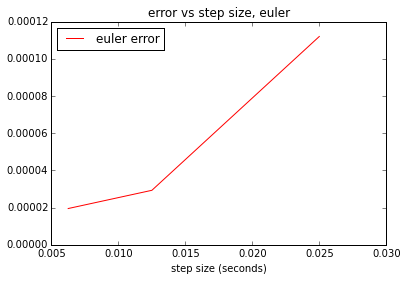

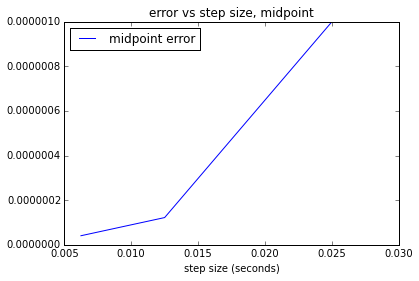

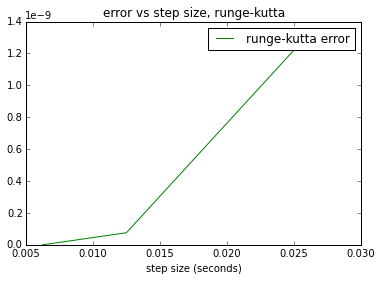

In [41]:
### plot
dt = [.025, .0125, .00625]
ye = [1.12e-04, 2.93e-05 ,1.95e-05]

theFig=plt.figure(0)
theFig.clf()
theAx=theFig.add_subplot(111)
#l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('step size (seconds)')
l2=theAx.plot(dt,ye,'r-',label='euler error')
# l3=theAx.plot(dt,ym,'g-',label='midpoint')
# l4=theAx.plot(dt,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('error vs step size, euler')

### plot
dt = [.025, .0125, .00625]
ye = [1.00e-06, 1.22e-07 ,4.06e-08]

theFig=plt.figure(1)
theFig.clf()
theAx=theFig.add_subplot(111)
#l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('step size (seconds)')
l2=theAx.plot(dt,ye,'b-',label='midpoint error')
# l3=theAx.plot(dt,ym,'g-',label='midpoint')
# l4=theAx.plot(dt,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('error vs step size, midpoint')

### plot
dt = [.025, .0125, .00625]
ye = [1.22e-09, 7.56e-11 ,7.93e-14]

theFig=plt.figure(2)
theFig.clf()
theAx=theFig.add_subplot(111)
#l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('step size (seconds)')
l2=theAx.plot(dt,ye,'g-',label='runge-kutta error')
# l3=theAx.plot(dt,ym,'g-',label='midpoint')
# l4=theAx.plot(dt,yrk,'m-',label='rk4')
theAx.legend(loc='best')
theAx.set_title('error vs step size, runge-kutta')

<a name="problem_embedded"></a>
**Problem embedded**: Though the error estimate is for the embedded
fourth-order Runge-Kutta method, the fifth-order method can be used in
practice for calculating the solution, the assumption being the
fifth-order method should be at least as accurate as the fourth-order
method. In the demo below, compare solutions of the test problem
(eq: test2]) 

$$\frac{dy}{dt} = -y +t +1,  \;\;\;\; y(0) =1\ \ \ \mathbf{eq: test2}$$

generated by the fifth-order method with solutions generated by the
standard fourth-order Runge-Kutta method. Which method
is more accurate? Again, determine how the error decreases as you halve
the stepsizes. 

**Embedded answer** The embedded runge-kutta is more accurate (order 1E-13, as opposed to order 1E-9). The below graphs show global error at each time step, with a step size of 0.025. For both methods, the global error appears to converge to a finite value as t increases. 

To see general trends in change in error in step size, I plotted the global error at step sizes of .05, .025, and .0125 (plots below). Reading off the graphs (not printing out actual values), I see the following trends:


Error at T_end
$$
\begin{array}{|c|c|cccc|c|} \hline
dt & R-K & embedded R-K  \\ \hline
.05 & 2E-8 &1.6E-11 \\ 
.025 & 1.2E-9 &5E-13\\ 
.0125 & 8E-11 &1.6E-14 \\ 
\end{array}
$$ 

This suggests that error decreases exponentially as time steps are halved.

/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


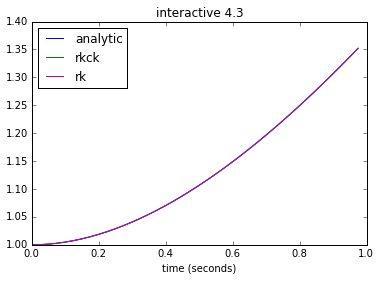

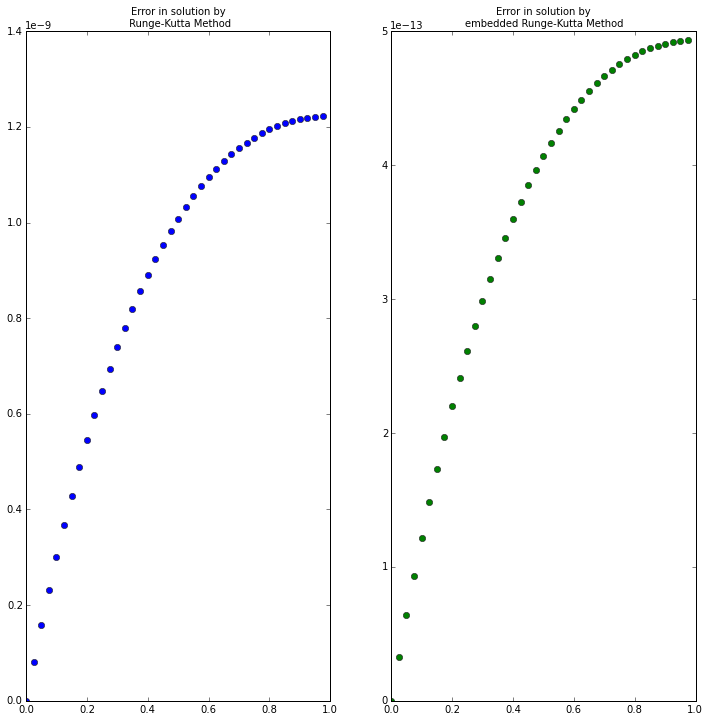

In [42]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.025,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)
theFig,theAx=plt.subplots(1,1)
l1=theAx.plot(timeVec,analytic,'b-',label='analytic')
theAx.set_xlabel('time (seconds)')
l2=theAx.plot(timeVec,yrkck,'g-',label='rkck')
l3=theAx.plot(timeVec,yrk,'m-',label='rk')
theAx.legend(loc='best')
theAx.set_title('interactive 4.3')


fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(1,3):
  
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        y = abs(analytic-yrk)   
        color = 'bo'
        str = "Error in solution by \n Runge-Kutta Method"

    elif i == 2:
        y = abs(analytic-yrkck)
        color = 'go'
        str = "Error in solution by \nembedded Runge-Kutta Method"
     

    ax.plot(timeVec,y, color)
    ax.hold(True)
    titl =  str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
#     if (i == 2):
#         ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()




/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


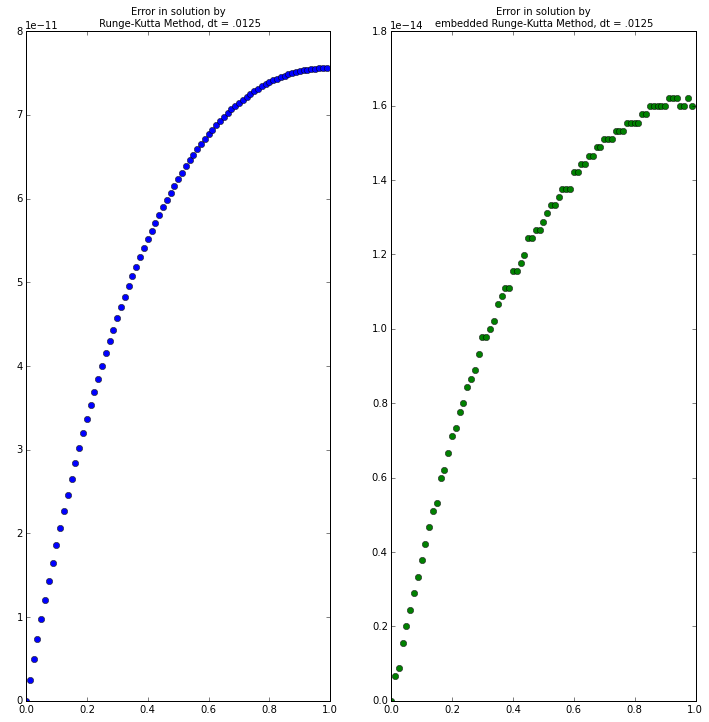

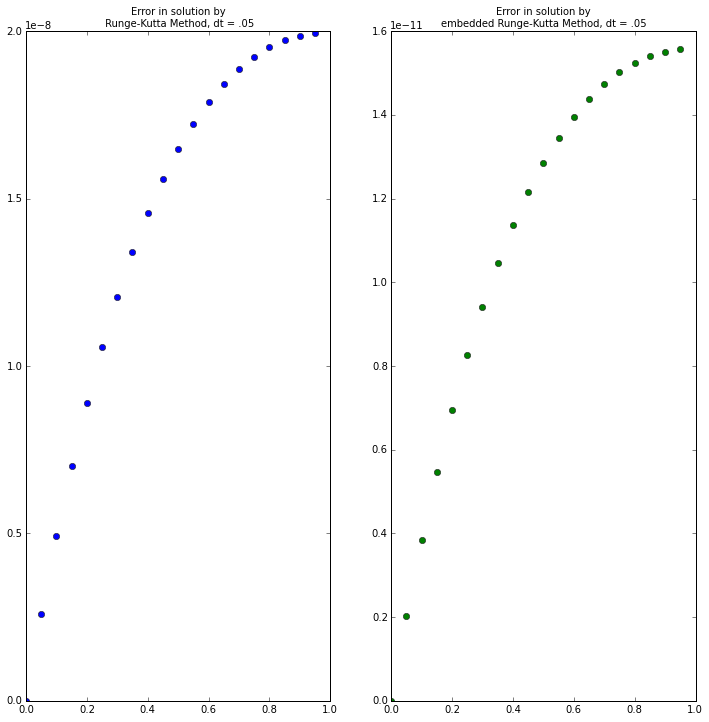

In [43]:
import numpy as np
from matplotlib import pyplot as plt

from numlabs.lab4.lab4_functions import initinter41,rk4ODEinter41,rkckODEinter41
initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.0125,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(1,3):
  
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        y = abs(analytic-yrk)   
        color = 'bo'
        str = "Error in solution by \n Runge-Kutta Method, dt = .0125"

    elif i == 2:
        y = abs(analytic-yrkck)
        color = 'go'
        str = "Error in solution by \nembedded Runge-Kutta Method, dt = .0125"
     

    ax.plot(timeVec,y, color)
    ax.hold(True)
    titl =  str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
#     if (i == 2):
#         ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()


initialVals={'yinitial': 1,'t_beg':0.,'t_end':1.,'dt':0.05,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

timeVec=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(timeVec)
ye=[]
ym=[]
yrk=[]
yrkck=[]
y1=coeff.yinitial
y2=coeff.yinitial
yrk.append(coeff.yinitial)
yrkck.append(coeff.yinitial)
for i in np.arange(1,nsteps):
    ynew=rk4ODEinter41(coeff,y1,timeVec[i-1])
    yrk.append(ynew)
    y1=ynew 
    ynew=rkckODEinter41(coeff,y2,timeVec[i-1])
    yrkck.append(ynew)
    y2=ynew 
analytic=timeVec + np.exp(-timeVec)

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

for i in range(1,3):
  
    ax = fig.add_subplot(1,2,i)
    if i == 1:
        y = abs(analytic-yrk)   
        color = 'bo'
        str = "Error in solution by \n Runge-Kutta Method, dt = .05"

    elif i == 2:
        y = abs(analytic-yrkck)
        color = 'go'
        str = "Error in solution by \nembedded Runge-Kutta Method, dt = .05"
     

    ax.plot(timeVec,y, color)
    ax.hold(True)
    titl =  str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
#     if (i == 2):
#         ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()

###Problem Coding A:

As set up above, test.py
solved the damped, harmonic oscillator with the (unstable) forward Euler method.

1.  Write a new routine that solves the harmonic oscilator using [Heun’s method](#eq_heuns)
    along the lines of the routines in [lab4_functions.py](https://github.com/phaustin/numeric/blob/master/numlabs/lab4/lab4_functions.py)

    Hand in a notebook with the code and a plot.
    
To solve this, I rewrote the example with an additional function called heun, modified from the functions in test.py, and then applied the heun function to the problem instead of the euler4 function. The rest of the code remains unchanged. 

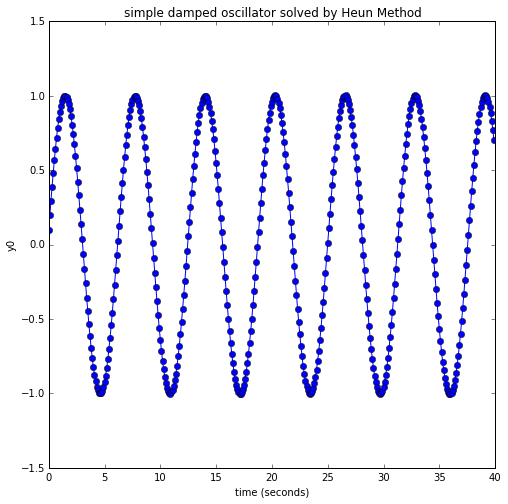

In [44]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init,euler4# heun
#
# specify the derivs function
#
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

def heun(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y + ((2.0/3.0) * k1))
  ynew = y + (1.0/4.0) * (k1) + (3.0/4.0) * (k2)
  return ynew



## redefine the initial vals for the Heun's method!

initialVals={'yinitial': [0.,1.],'t_beg':0.,'t_end':40.,'dt':.1,'c1':0.,'c2':1.0}
initialVals['comment'] = 'written Oct. 6, 2015'
initialVals['plot_title'] = 'simple damped oscillator solved by Heun Method'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff
#
        
infile='run_1.json'
coeff=read_init(infile)

#wooo heun's method

time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0') 

<a name="prob_b"></a>    
**problem coding B**:

1.  Now solve the following test equation by both the midpoint and
    Heun’s method and compare. $$f(y,t) = t - y  + 1.0$$ Choose two sets
    of initial conditions and investigate the behaviour.

2.  Is there any difference between the two methods when applied to
    either problem? Should there be? Explain by analyzing the steps
    that each method is taking.
    
1). I rewrote the derivative as follows in the equation derivsB, then used that derivative in the midpoint and heun methods - slightly modifying the code from the lab. I chose initial conditions of y = -100 and y = 100, and plotted several subplots showing the behaviour of the solution. 




/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


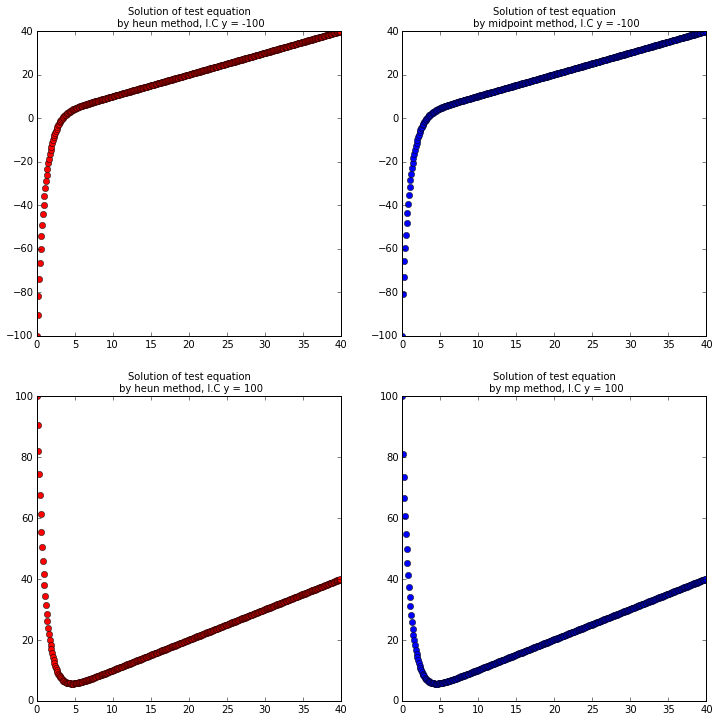

In [45]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init
from matplotlib import pyplot as plt
#
# specify the derivs function
def derivsB(coeff,y,t):
#    f = np.empty_like(y) #2 element vector for derivative

    f= - coeff.c1*y + coeff.c2*t + 1
    return f

def midpoint4(coeff, y, derivsB,t):
    ynew = y + coeff.dt*derivsB(coeff,y,t + (0.5 * coeff.dt * derivsB(coeff,y,t)),)
    return ynew

def heun2(coeff, y, derivs,t):
    k1 = coeff.dt * derivsB(coeff,y,t)
    k2 = coeff.dt * derivsB(coeff,y + ((2.0/3.0) * k1),t)
    ynew = y + (1.0/4.0) * (k1) + (3.0/4.0) * (k2)
    return ynew


initialVals={'yinitial': -100.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff

infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y = coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 

heunsData = np.empty([nsteps],'float')
heunsData[0] =y
mpData = np.empty([nsteps],'float')
mpData[0] =y

for i in range(1,400):
    t = time[i]
    y=heun2(coeff,y,derivsB,t)
    ymp = midpoint4(coeff,y,derivsB,t)
    heunsData[i]=y
    mpData[i] = ymp
    
heun_1 = heunsData;
mp_1 = mpData;
###

initialVals={'yinitial': 100.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':1.,'c2':1.}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff

infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y = coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 

heunsData = np.empty([nsteps],'float')
heunsData[0] =y
mpData = np.empty([nsteps],'float')
mpData[0] =y


for i in range(1,400):
    t = time[i]
    y=heun2(coeff,y,derivsB,t)
    ymp = midpoint4(coeff,y,derivsB,t)
    heunsData[i]=y
    mpData[i] = ymp

    
heun_2 = heunsData;
mp_2 = mpData;

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False


for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        y = heun_1    
        color = 'ro'
        str = "heun method, I.C y = -100"

    elif i == 2:
        y = mp_1
        color = 'bo'
        str = "midpoint method, I.C y = -100"
    elif i == 3:
        y=heun_2      
        color = 'ro'
        str = "heun method, I.C y = 100"
    elif i == 4:
        y= mp_2
        color = 'bo'
        str = "mp method, I.C y = 100"        

    ax.plot(time,y, color)
    ax.hold(True)
    titl =  "Solution of test equation \n by " + str
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})
    if (i == 2):
        ax.set_ylim((-100,40))

fig.set_facecolor('w')
plt.show()

2). No, the plots above show that both methods should give the same answer - I ran out of time in proving this analytically.
<img src=files/images/attempt.JPG>

<a name="prob_c"></a>    
**problem coding C**:

6.  Solve the Newtonian cooling equation of lab 1 by any of the above
    methods. 

7.  Hand in some sample plots along with the parameter values and
    initial conditions used.
    

I solved the Newtonian cooling equation by Heun's method, taking lambda values of 1 and 2, intial temperatures of -70 and 70, and an ambient temperature of 20. Subplots are shown below. 
    
    

/Users/alena/anaconda/lib/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


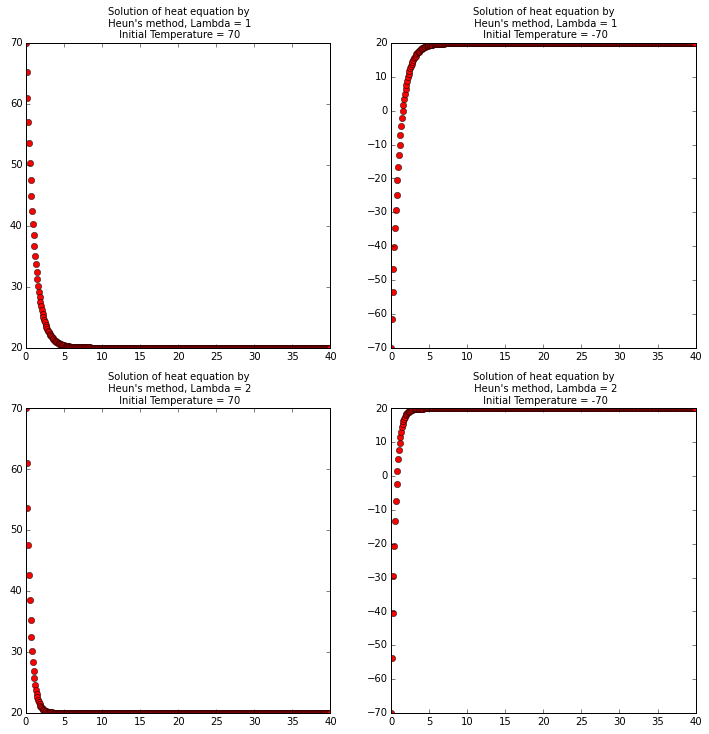

In [46]:
%matplotlib inline
import numpy as np
import json
from numlabs.lab4.example.test import read_init
from matplotlib import pyplot as plt
#
# specify the derivs function
#

L = 1
Ta = 20
def derivsC(coeff,y):
    f = -(coeff.c1)*(y-coeff.c2)
    return f

def heun2(coeff, y, derivs,t):
    k1 = coeff.dt * derivsC(coeff,y,)
    k2 = coeff.dt * derivsC(coeff,y + ((2.0/3.0) * k1))
    ynew = y + (1.0/4.0) * (k1) + (3.0/4.0) * (k2)
    return ynew

# first make sure we have an input file in this directory
#
initialVals={'yinitial': 70.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':L,'c2':Ta}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff     
infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y=coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 
heunsData = np.empty([nsteps],'float')
mpData = np.empty([nsteps],'float')
heunsData=np.empty([nsteps],np.float64)
heunsData[0] = coeff.yinitial

for i in range(nsteps-1):
    t = time[i]
    y=heun2(coeff,y,derivsC,t)
    heunsData[i+1]=y

hd1 = heunsData
####
L = 1
Ta = 20
initialVals={'yinitial': -70.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':L,'c2':Ta}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff     
infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y=coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 
heunsData = np.empty([nsteps],'float')
mpData = np.empty([nsteps],'float')
heunsData=np.empty([nsteps],np.float64)
heunsData[0] = coeff.yinitial

for i in range(nsteps-1):
    t = time[i]
    y=heun2(coeff,y,derivsC,t)
    heunsData[i+1]=y

hd2 = heunsData
####
L = 2
Ta = 20
initialVals={'yinitial': 70.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':L,'c2':Ta}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff     
infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y=coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 
heunsData = np.empty([nsteps],'float')
mpData = np.empty([nsteps],'float')
heunsData=np.empty([nsteps],np.float64)
heunsData[0] = coeff.yinitial

for i in range(nsteps-1):
    t = time[i]
    y=heun2(coeff,y,derivsC,t)
    heunsData[i+1]=y

hd3 = heunsData

####
L = 2
Ta = 20
initialVals={'yinitial': -70.,'t_beg':0.,'t_end':40.,'dt':0.1,'c1':L,'c2':Ta}
initialVals['comment'] = 'written Sep. 29, 2015'
initialVals['plot_title'] = 'simple damped oscillator run 1'

infile='run_1.json'
with open(infile,'w') as f:
      f.write(json.dumps(initialVals,indent=4))
#
#  now read the initial information into a namedtuple coeff     
infile='run_1.json'
coeff=read_init(infile)
# integrate and save the result in savedata
y=coeff.yinitial
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
nsteps=len(time) 
heunsData = np.empty([nsteps],'float')
mpData = np.empty([nsteps],'float')
heunsData=np.empty([nsteps],np.float64)
heunsData[0] = coeff.yinitial

for i in range(nsteps-1):
    t = time[i]
    y=heun2(coeff,y,derivsC,t)
    heunsData[i+1]=y

hd4 = heunsData

fig, big_axes = plt.subplots( figsize=(12.0, 12.0) , nrows=3, ncols=1, sharey=True) 
for row, big_ax in enumerate(big_axes, start=1):
    big_ax.tick_params(labelcolor=(1.,1.,1., 0.0), top='off', bottom='off', left='off', right='off')
    # removes the white frame
    big_ax._frameon = False

#this way of doing things is silly but oh well I am not that good at python

for i in range(1,5):
  
    ax = fig.add_subplot(2,2,i)
    if i == 1:
        y = hd1
        color = 'ro'
        string = "Lambda = 1 \n Initial Temperature = 70"

    elif i == 2:
        y = hd2
        color = 'ro'
        string = "Lambda = 1 \n Initial Temperature = -70"
    elif i == 3:
        y = hd3
        color = 'ro'
        string = "Lambda = 2 \n Initial Temperature = 70"
    elif i == 4:
        y = hd4
        color = 'ro'
        string = "Lambda = 2 \n Initial Temperature = -70"
            

    ax.plot(time,y, color)
    ax.hold(True)
    titl =  "Solution of heat equation by \n Heun's method, " + string
    ax.set_title(titl, fontsize = 10)
    ax.legend(loc=2,prop={'size':6})

fig.set_facecolor('w')
plt.show()